In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumer_key = "cx83ZljBHab3bnBjVnG1FBDzf"
consumer_secret = "ryDeUWIa3CQGoszANUOVT2l7k8POr2GzkppRoWpeNY7umZfh3s"
access_token = "857240278268116993-8UfQlpN2xuES6BPUAJ5wFeibKAYdtie"
access_token_secret = "g9hLnhv2VK7vdYgVQBnaACKIf5WRjTg0UjcymNxrmziy8"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
Hs_tweets = api.user_timeline(screen_name="Tokopedia", count=1000, lang="en", tweet_mode="extended")

In [ ]:
print("Show the 5 recent tweets:\n")
i=1
for tweet in Hs_tweets[:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i= i+1


Show the 5 recent tweets:

1)@nrltsprlb Masak sihhhhh😭

2)RT @tokopedia: Biasa kalo konser butuh memori brapa GB sih??

Segini cukup la ya... Mia baru checkout khusus buat #BETHESUNINJKT besok😆💙

#…

3)@akumayess Pernahhh. Langsung Minto mainin Twitter akun Tokopedia di depan dia aja 😎 Terus dia terkejut-kejut 😂

4)@elvanmadden Kuch Justin nggak ngerti main Twitter kak 😜

5)@Indomy0610 Ya ndak mampu akuuu 😁



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in Hs_tweets], columns=['Tweets'])
df.head()

,Tweets
0,@nrltsprlb Masak sihhhhh😭
1,RT @tokopedia: Biasa kalo konser butuh memori ...
2,@akumayess Pernahhh. Langsung Minto mainin Twi...
3,@elvanmadden Kuch Justin nggak ngerti main Twi...
4,@Indomy0610 Ya ndak mampu akuuu 😁


In [ ]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0-9]', '', text)
 text = re.sub('#', '', text)
 text = re.sub('RT[\s]', '', text)
 text = re.sub('https?:\/\/S+', '', text)

 return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,rltsprlb Masak sihhhhh😭
1,okopedia: Biasa kalo konser butuh memori brapa...
2,kumayess Pernahhh. Langsung Minto mainin Twitt...
3,lvanmadden Kuch Justin nggak ngerti main Twitt...
4,ndomy0610 Ya ndak mampu akuuu 😁
...,...
195,antansekamar riJancuk_ dextratime Ya ampunnn b...
196,riJancuk_ dextratime Mau angkat piala Dunia? N...
197,hyanaSurdin Anjayyyy Mia demen nihhh sama cowo...
198,"IF09 nfinixIndo Diam-diam merayap, bikin hati ..."


In [ ]:
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
 return TextBlob(text).sentiment.polarity
 
df['Subjecttivity'] = df['Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Tweets'].apply(getPolarity)

df


,Tweets,Subjecttivity,Polarity
0,rltsprlb Masak sihhhhh😭,0.000000,0.000000
1,okopedia: Biasa kalo konser butuh memori brapa...,0.000000,0.000000
2,kumayess Pernahhh. Langsung Minto mainin Twitt...,0.000000,0.000000
3,lvanmadden Kuch Justin nggak ngerti main Twitt...,0.333333,0.166667
4,ndomy0610 Ya ndak mampu akuuu 😁,0.000000,0.000000
...,...,...,...
195,antansekamar riJancuk_ dextratime Ya ampunnn b...,0.000000,0.000000
196,riJancuk_ dextratime Mau angkat piala Dunia? N...,0.000000,0.000000
197,hyanaSurdin Anjayyyy Mia demen nihhh sama cowo...,0.000000,0.000000
198,"IF09 nfinixIndo Diam-diam merayap, bikin hati ...",0.000000,0.000000


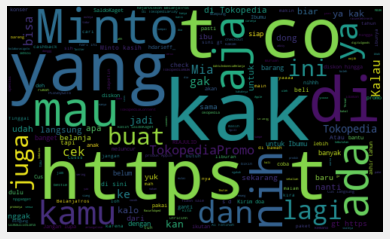

In [ ]:
allWords = ''.join([twts for twts in df['Tweets']])
WordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):

 if score < 0:
  return 'Negatif'
 elif score == 0:
  return 'Netral'
 else:
  return 'Positif'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df


,Tweets,Subjecttivity,Polarity,Analysis
0,rltsprlb Masak sihhhhh😭,0.000000,0.000000,Netral
1,okopedia: Biasa kalo konser butuh memori brapa...,0.000000,0.000000,Netral
2,kumayess Pernahhh. Langsung Minto mainin Twitt...,0.000000,0.000000,Netral
3,lvanmadden Kuch Justin nggak ngerti main Twitt...,0.333333,0.166667,Positif
4,ndomy0610 Ya ndak mampu akuuu 😁,0.000000,0.000000,Netral
...,...,...,...,...
195,antansekamar riJancuk_ dextratime Ya ampunnn b...,0.000000,0.000000,Netral
196,riJancuk_ dextratime Mau angkat piala Dunia? N...,0.000000,0.000000,Netral
197,hyanaSurdin Anjayyyy Mia demen nihhh sama cowo...,0.000000,0.000000,Netral
198,"IF09 nfinixIndo Diam-diam merayap, bikin hati ...",0.000000,0.000000,Netral


In [ ]:
print('Printing Negatif tweests:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, sortedDF.shape[0] ):
 if ( sortedDF['Analysis'][i] == 'Negatif'):
     print(str(j) + ') ' +sortedDF['Tweets'][i])
print()
j=j+1

Printing Negatif tweests:

1) 1. Uno game, is a must!
https://t.co/wva9tNOSJF
1) Akhir tahun upgrade rumah kali yaa🤔

Mumpung diskon s.d 1,5jt nih bisa ganti vacuum cleaner sampe ke TV digital loh!

Check out di siniii kalo mau pake promonya!😍 &gt;&gt;
https://t.co/BlYhMnuvg1 

TokopediaTekno RacunElektronik TokopediaPromo



In [ ]:
print('Printing Negatif tweests:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0, sortedDF.shape[0] ):
 if ( sortedDF['Analysis'][i] == 'Positif'):
     print(str(j) + ') ' +sortedDF['Tweets'][i])
print()
j=j+1

Printing Negatif tweests:

1) lvanmadden Kuch Justin nggak ngerti main Twitter kak 😜
1) Berhubung mau ganti tahun, Mia mau ganti warna cat rambut ahh😆

Tapi Mia bingung, mau pilih antara warna Borahae atau Rose Gold🤔

Coba dong bestie online Mia, bantu pilih kira-kira warna mana yang cocok di Mia hehehehe🥰

KejarDiskon BelanjaTros TokopediaPromo
1) okopedia: Mau nanya donggg, konser Be the Sun nanti boleh gak ya bawa ini... :)

Tapi Mia checkout dulu deh hehe persiapan next konser…
1) Kapan lagi main Tokopedia Seru bisa LANGSUNG dapet kupon diskon? Berlaku tiap hari lagi 😜

Seruu kan? Cus, langsung main di sini! &gt; https://t.co/RnkesGZE5O

tokopediaseru belanjatros tokopediapromo
1) ayatiSalsa Hi Kak Salsa, perihal kesepakatan retur dengan penjual, mohon infokan nomor invoice yang berkendala melalui DM yang nantinya akan kita bantu pengecekan lebih lanjut ya. Thanks :)
1) 💚Love TokopediaNOW, love PLUSbyGoTo💚 Langganan PLUSbyGoTo dan dapetin cashback sampai 100 ribu tiap bulan dan beb

In [ ]:
print('Printing Negatif tweests:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0, sortedDF.shape[0] ):
 if ( sortedDF['Analysis'][i] == 'Netral'):
     print(str(j) + ') ' +sortedDF['Tweets'][i])
print()
j=j+1

Printing Negatif tweests:

1) rltsprlb Masak sihhhhh😭
1) okopedia: Biasa kalo konser butuh memori brapa GB sih??

Segini cukup la ya... Mia baru checkout khusus buat BETHESUNINJKT besok😆💙

…
1) kumayess Pernahhh. Langsung Minto mainin Twitter akun Tokopedia di depan dia aja 😎 Terus dia terkejut-kejut 😂
1) ndomy0610 Ya ndak mampu akuuu 😁
1) ittyHunter43 Wkwk iya juga 🤣
1) alesha32 Ciee sayang ibu 😍
1) inCheonsa894 Setau Minto bisa kak, tapi sistemnya Pre-Order dan kakaknya juga mesti interaksi terlebih dahulu dengan Sellernya ya 😉
1) meraldofor7boy Kamu coba perhatiin apa yang lagi sering dia lakuin kak? Dari situ kamu pasti bakal nemu apa yang Ibumu butuh 😘
1) avendermang54 Alamatnya sudah tau. Tinggal doanya kak untuk Ibumu 😇
1) nrkhsnngrh Kirim doa kak meskipun beda alam, pasti beliau butuh doa dari anakmu 😇
1) inyuwnki Kirim doa terus kak jangan sampai putus 😇
1) yAbyss2 Iya kak Minto tanggung jawab dengan kirim doa untuk ibumu yaa 😇
1) riesgvlr Belanjain juga kan kak? 😉
1) rxldtza 

AttributeError: ignored

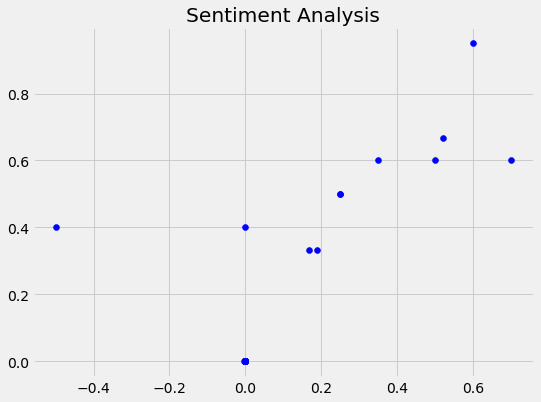

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjecttivity"][i], color="blue")

plt.title('Sentiment Analysis')
plt.xlable('Polarity')
plt.ylable('Subjecttivity')

plt.show()


In [ ]:
ptweets= df[df.Analysis == 'Positif']
ptweets= ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

4.5

In [ ]:
ptweets= df[df.Analysis == 'Negatif']
ptweets= ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

1.0

In [ ]:
ptweets= df[df.Analysis == 'Netral']
ptweets= ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

94.5